# <center> <u> Feed Forward Neural Network </u> </center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
x = np.linspace(-6, 6, 1000)

In [3]:
def tanh(x):
    return np.tanh(x)

def d_tanh(x):
    return 1 - np.square(np.tanh(x))

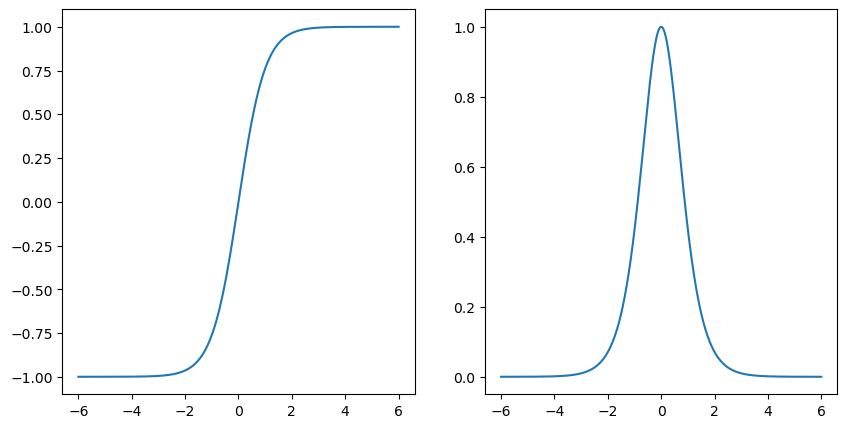

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))

ax1.plot(x, tanh(x))
ax2.plot(x, d_tanh(x))

plt.show()

In [5]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def d_sigmoid(x):
    return (1 - sigmoid(x)) * sigmoid(x)

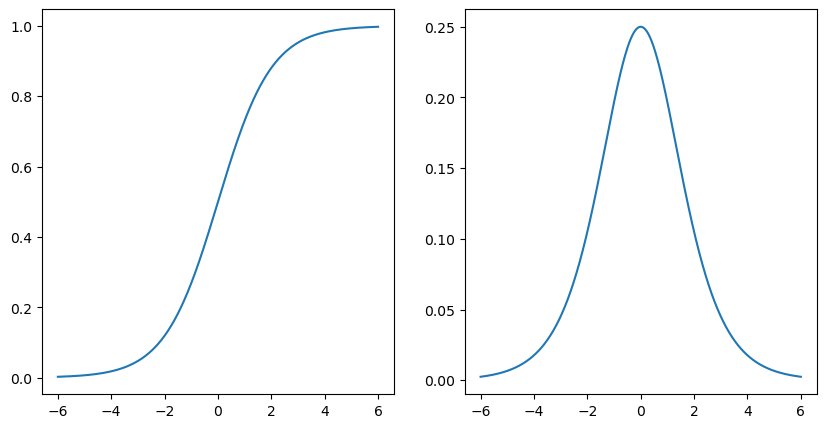

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))

ax1.plot(x, sigmoid(x))
ax2.plot(x, d_sigmoid(x))

plt.show()

In [7]:
def linear(x):
    return x

def d_linear(x):
    return np.ones(x.shape)

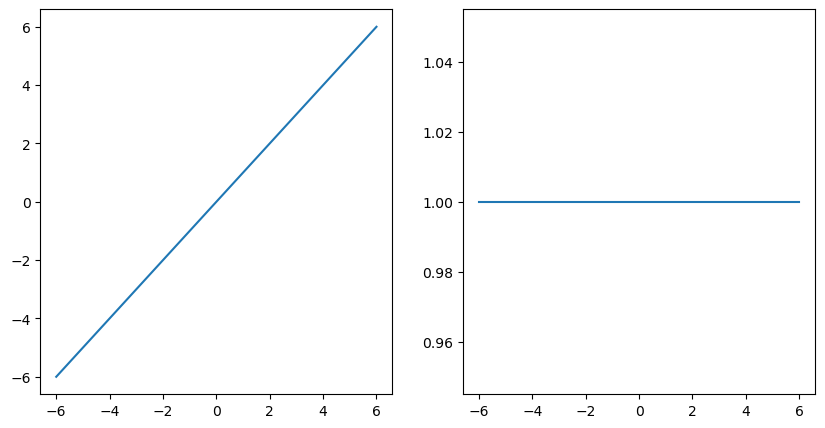

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))

ax1.plot(x, linear(x))
ax2.plot(x, d_linear(x))

plt.show()

In [9]:
def squared_loss(y, a):
    return (a - y)**2

def d_squared_loss(y, a):
    return (a - y)

In [10]:
def logloss(y, a):
    return -(y*np.log(a) + (1-y)*np.log(1-a))

def d_logloss(y, a):
    return (a - y)/(a*(1 - a))

## <center> Mathematical Structure </center>

## <center> $ W = (n, x) $ </center>

## <center> $ b = (n, 1) $ </center>

## <center> Propagation </center>

## <center> $ z = WA + b $ </center>

## <center> $ A = g(z) $ </center>

## <center> Backpropagation </center> 

## <center> $ C = \frac{1}{N} \sum_{i=1}^{N} L(y_{i}, \hat{y_{i}}) $ </center>

## <center> $ dz = g'(z) \cdot \nabla(a) $ </center> 

## <center> $ dw = \frac{1}{N} \cdot (dz \cdot a_{i-1}) $ </center>

## <center> $ db = \frac{1}{N} \sum_{i=1}^{N} (dz) $ </center>

## <center> $ da = W \cdot dz $ </center>

## <center> Gradient Descent </center> 

## <center> $ w_{i+1} = w_{i} - \gamma dw $ </center>

## <center> $ b_{i+1} = b_{i} - \gamma db $ </center>

In [11]:
class Layer:

    activationFunctions = {
        'tanh': (tanh, d_tanh),
        'sigmoid': (sigmoid, d_sigmoid),
        'linear': (linear, d_linear)
    }
    
    learning_rate = 0.1

    def __init__(self, inputs, neurons, activation):
        self.W = np.random.randn(neurons, inputs)
        self.b = np.zeros((neurons, 1))
        self.act, self.d_act = self.activationFunctions.get(activation)

    def feedforward(self, A_prev):
        self.A_prev = A_prev
        self.Z = np.dot(self.W, self.A_prev) + self.b
        self.A = self.act(self.Z)
        return self.A

    def backprop(self, dA):
        dZ = np.multiply(self.d_act(self.Z), dA)
        dW = 1/dZ.shape[1] * np.dot(dZ, self.A_prev.T)
        db = 1/dZ.shape[1] * np.sum(dZ, axis=1, keepdims=True)
        dA_prev = np.dot(self.W.T, dZ)

        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db

        return dA_prev

## <center> Feed Forward Classifier </center> 

In [12]:
x_train = np.array([[0, 0, 1, 1], [0, 1, 0, 1]]) # dim x m
print(x_train.shape)

y_train = np.array([[0, 1, 1, 0]]) # 1 x m
print(y_train.shape)

(2, 4)
(1, 4)


In [13]:
m = 4
epochs = 1500

layers = [Layer(2, 3, 'tanh'), Layer(3, 1, 'sigmoid')]
costs = [] 

for epoch in range(epochs):
    A = x_train
    for layer in layers:
        A = layer.feedforward(A)

    cost = 1/m * np.sum(logloss(y_train, A))
    costs.append(cost)

    dA = d_logloss(y_train, A)
    for layer in reversed(layers):
        dA = layer.backprop(dA)


# Making predictions
A = x_train
for layer in layers:
    A = layer.feedforward(A)
print(A)

[[0.00558227 0.97005276 0.97175986 0.03850768]]


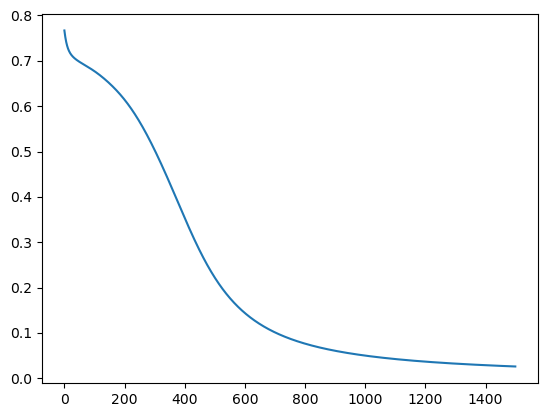

In [14]:
plt.plot(range(epochs), costs)

## <center> Feed Forward Regressor </center> 

In [15]:
X = np.array([np.sin(2 * x) + np.random.normal(0, 0.1, x.shape)])
print(X.shape)

y = np.array([np.sin(2 * x)])
print(y.shape)

(1, 1000)
(1, 1000)


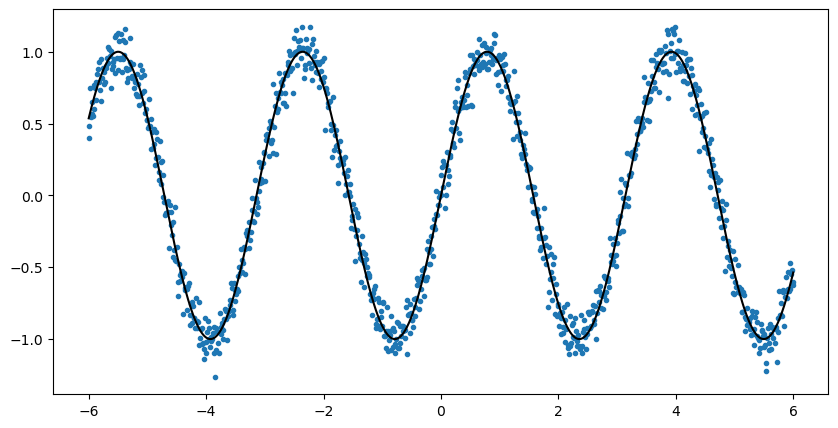

In [16]:
plt.figure(figsize = (10, 5))

plt.scatter(x, X[0], marker = ".")

plt.plot(x, y[0], color = "black")

plt.show()

In [25]:
m = 4
epochs = 10

layers = [Layer(1, 5, 'linear'), Layer(5, 1, 'linear')]
costs = [] 

for epoch in range(epochs):
    A = X
    for layer in layers:
        A = layer.feedforward(A)

    cost = 1/m * np.sum(squared_loss(y, A))
    costs.append(cost)

    dA = d_squared_loss(y, A)
    for layer in reversed(layers):
        dA = layer.backprop(dA)

# Making predictions
A = X
for layer in layers:
    A = layer.feedforward(A)

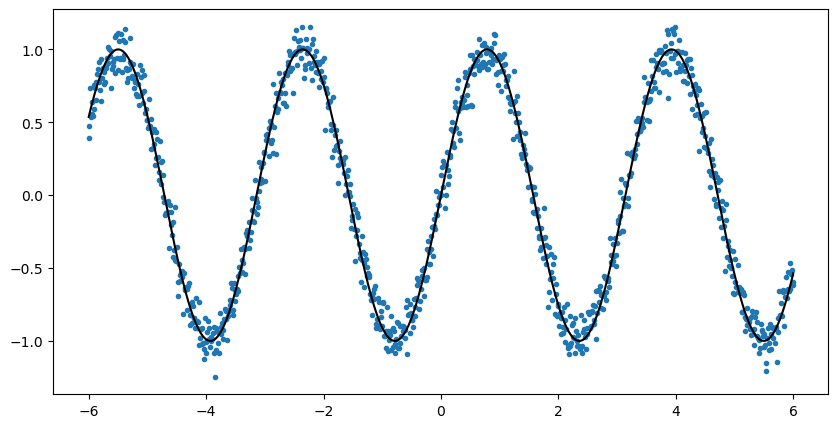

In [26]:
plt.figure(figsize = (10, 5))

plt.scatter(x, A[0], marker = ".")
plt.plot(x, y[0], color = "black")

plt.show()

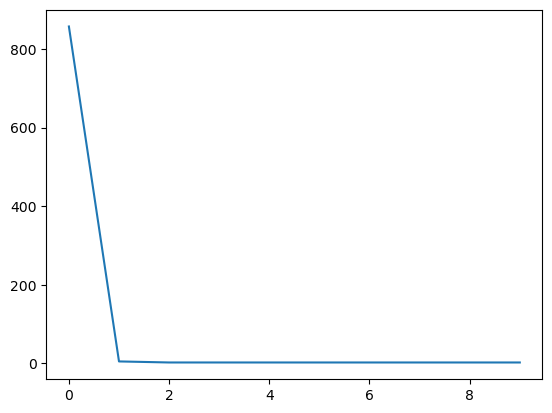

In [27]:
plt.plot(range(epochs), costs)